In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

sns.set()
%matplotlib inline

In [2]:
df=pd.read_csv('Wholesale customers data.csv')
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


# EDA

In [3]:
df.shape

(440, 8)

In [4]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [5]:
print("Channel unique values:",df['Channel'].unique())
print("Region unique values",df['Region'].unique())

Channel unique values: [2 1]
Region unique values [3 1 2]


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [7]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [8]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [9]:
categorical_features = ['Channel', 'Region']
continuous_features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

In [10]:
df['Channel'].value_counts()

1    298
2    142
Name: Channel, dtype: int64

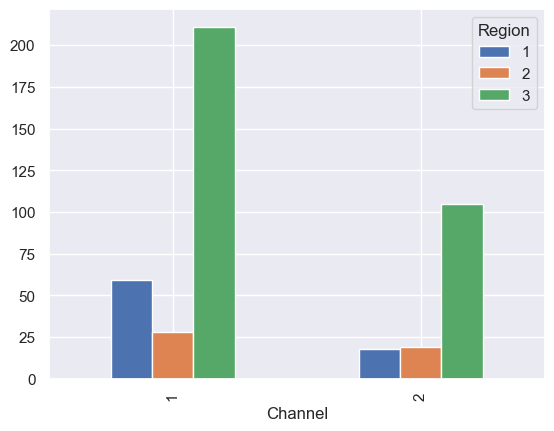

Region    1   2    3
Channel             
1        59  28  211
2        18  19  105


In [11]:
def categorical_multi(i,j):
    pd.crosstab(df[i],df[j]).plot(kind='bar')
    plt.show()
    print(pd.crosstab(df[i],df[j]))

categorical_multi(i='Channel',j='Region')    

In [12]:
df.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


<Axes: >

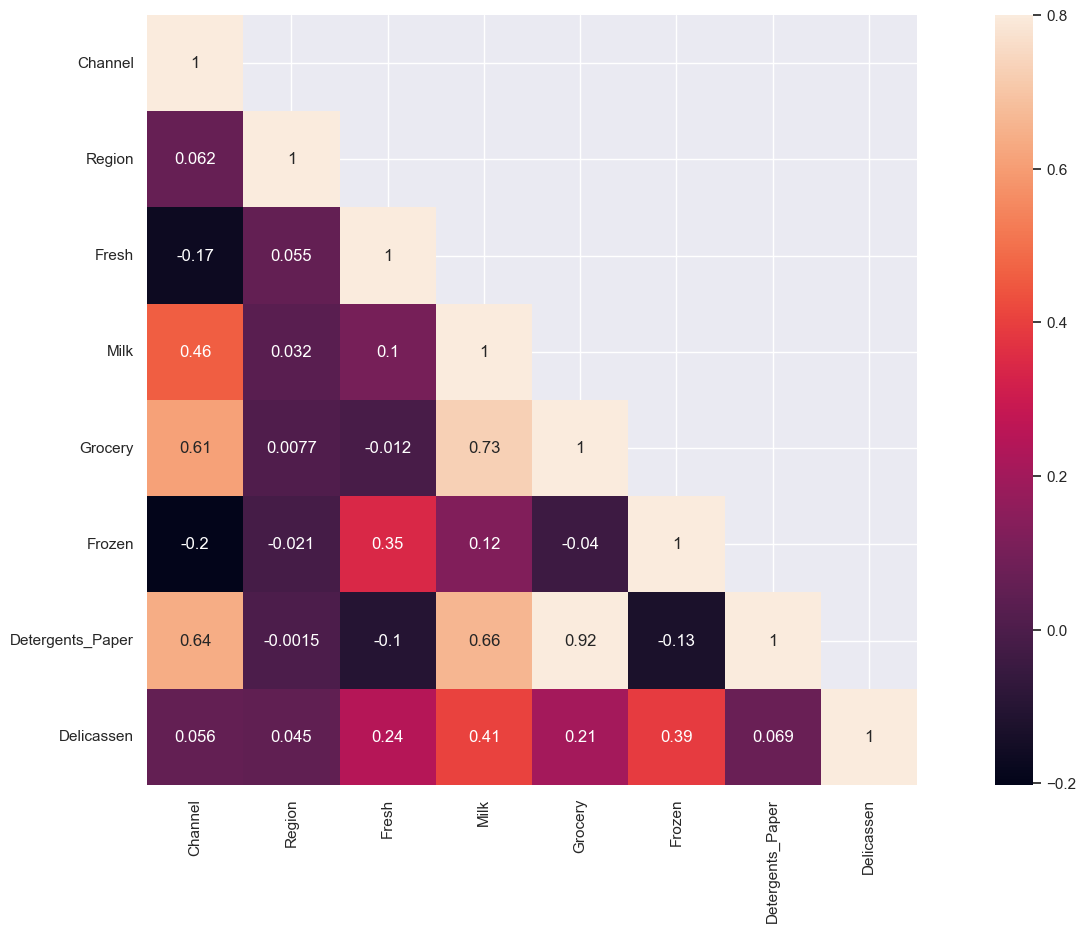

In [13]:
# Correlation analysis
corrMatt = df.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

Grocery and Detergents_Paper are highly correlated - 0.92

Milk and Groceries - 0.73

Milk and Detergents_Paper - 0.66

# Outliers

<Axes: >

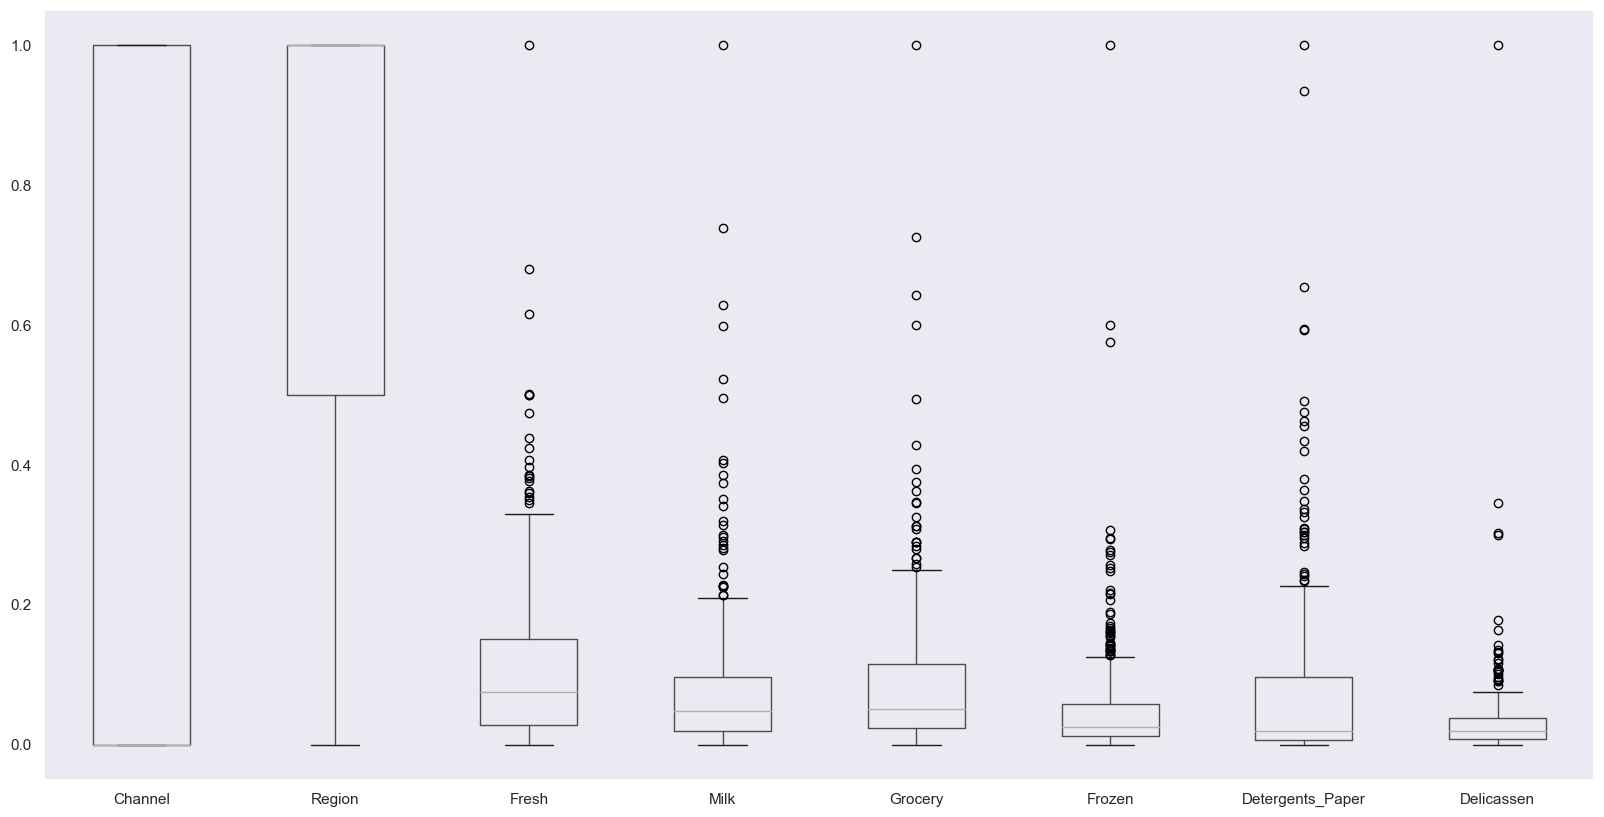

In [14]:
scaler = preprocessing.MinMaxScaler()
scaled = scaler.fit_transform(df)
scaled_data = pd.DataFrame(scaled, columns = [name for name in list(df)])
fig = plt.figure(figsize = (20,10))
scaled_data.boxplot(column=[name for name in list(scaled_data)], grid=False)

In [15]:
# removing the top 1% data from Fresh column
outlier = df['Fresh'].quantile(0.99)
df = df[df['Fresh']<outlier]

In [16]:
# removing the top 1% data from Milk column
outlier = df['Milk'].quantile(0.99)
df = df[df['Milk']<outlier]

In [17]:
# removing the top 1% data from Grocery column
outlier = df['Grocery'].quantile(0.99)
df = df[df['Grocery']<outlier]

In [18]:
# removing the top 2% data from Frozen column
outlier = df['Frozen'].quantile(0.98)
df = df[df['Frozen']<outlier]

In [19]:
# removing the top 1% data from Detergents_Paper column
outlier = df['Detergents_Paper'].quantile(0.99)
df = df[df['Detergents_Paper']<outlier]

In [20]:
# removing the top 1% data from Delicassen column
outlier = df['Delicassen'].quantile(0.99)
df = df[df['Delicassen']<outlier]

In [21]:
df.shape

(406, 8)

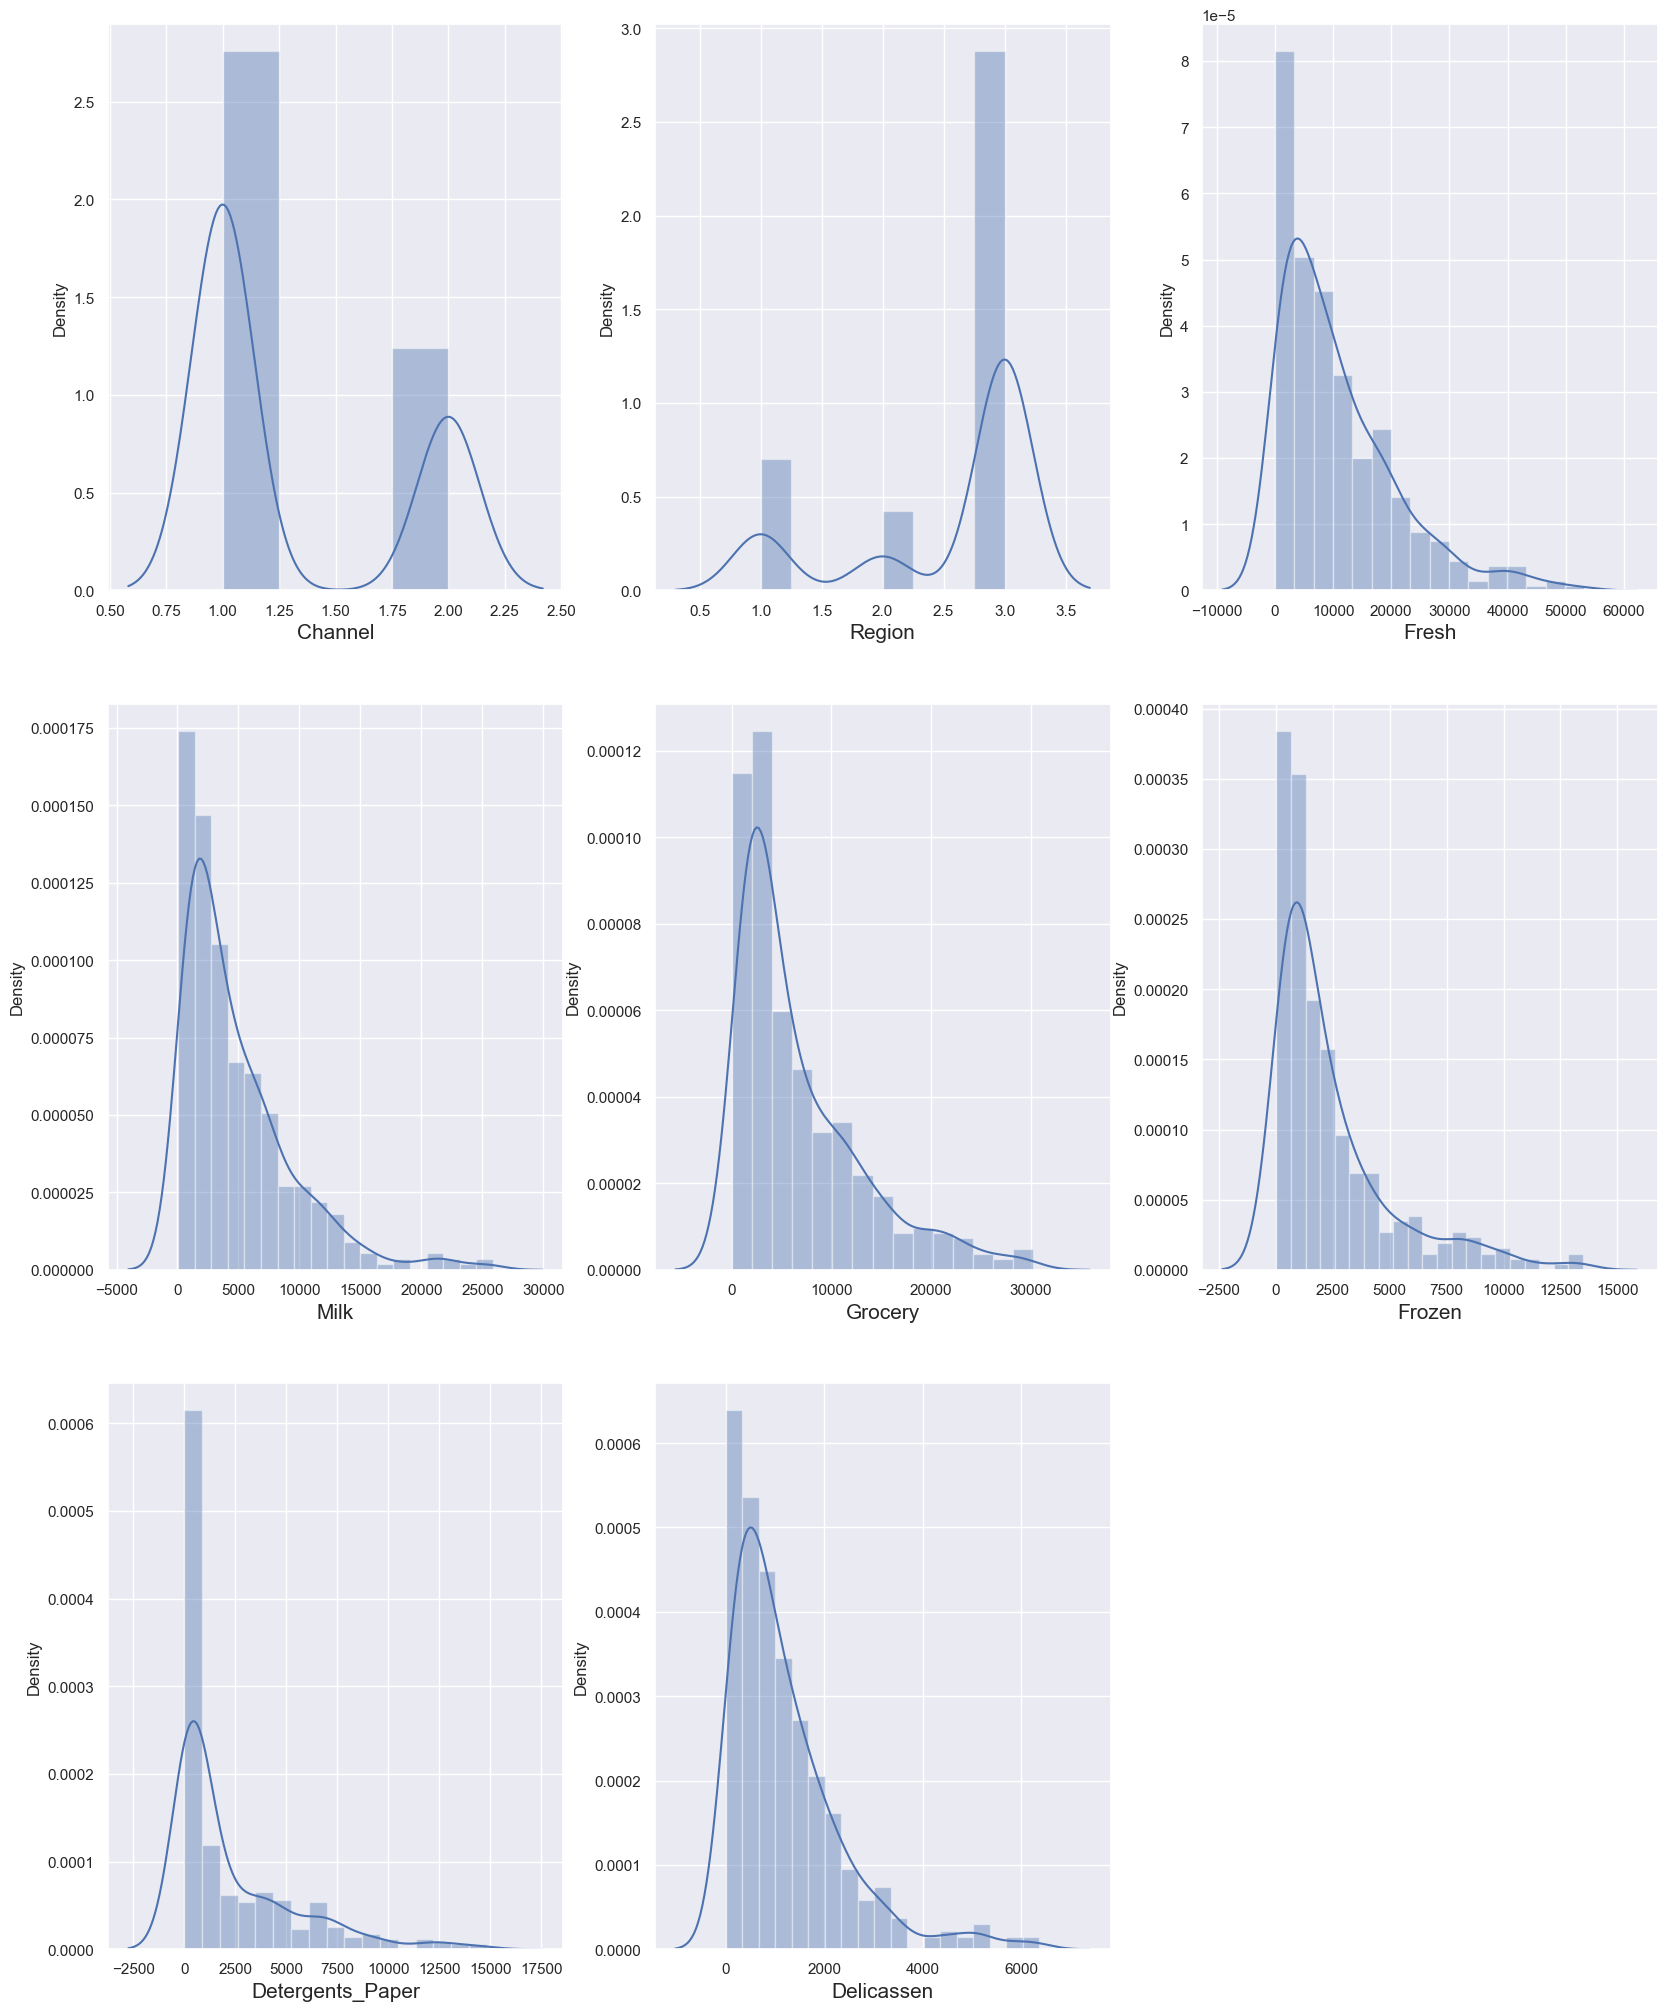

In [22]:
plt.figure(figsize = (20, 25))
plotnumber = 1

for column in df:
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1
plt.show()

<Axes: >

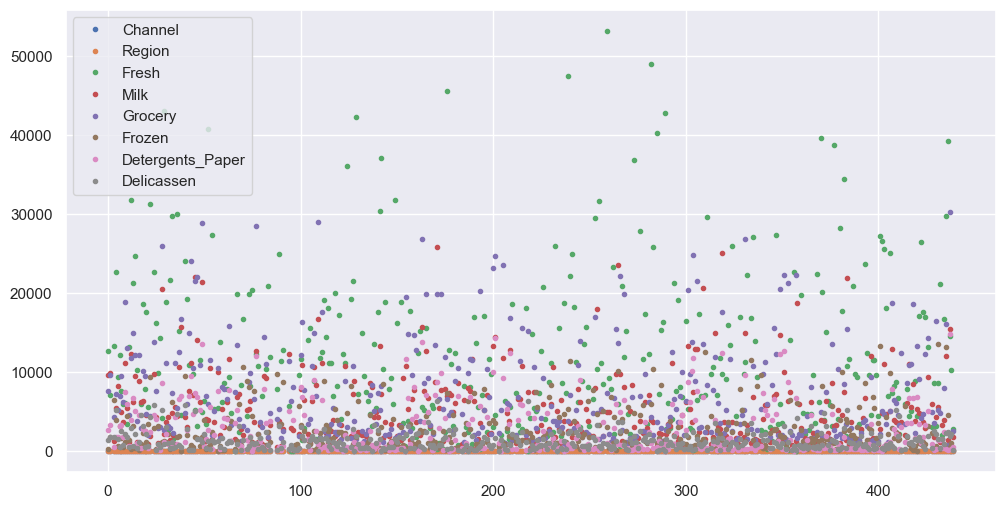

In [23]:
df.plot(figsize=(12,6), style='.')

No obvious trend in data set

# Standard Scaler Method

In [24]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler().fit_transform(df)

In [25]:
scaled_frame = pd.DataFrame(std_scale, columns=df.columns)
scaled_frame.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.490712,0.589348,0.188338,1.065939,0.139884,-0.843637,0.123635,0.115039
1,1.490712,0.589348,-0.372988,1.099977,0.461328,-0.253587,0.327709,0.501402
2,-0.670820,0.589348,0.247952,-0.803914,-0.395057,1.515802,-0.590788,0.511988
3,1.490712,0.589348,1.183163,0.127476,0.081745,0.567071,-0.172090,3.508509
4,1.490712,0.589348,-0.137335,0.757170,-0.250110,-0.671348,-0.166156,0.214717


In [26]:
scaled_frame.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,4.060000e+02,4.060000e+02,4.060000e+02,4.060000e+02,4.060000e+02,4.060000e+02,4.060000e+02,4.060000e+02
mean,1.400084e-16,3.500211e-17,-6.562895e-17,6.125368e-17,-3.500211e-17,3.500211e-17,8.750526e-17,7.437947e-17
std,1.001234e+00,1.001234e+00,1.001234e+00,1.001234e+00,1.001234e+00,1.001234e+00,1.001234e+00,1.001234e+00
min,-6.708204e-01,-1.997413e+00,-1.078548e+00,-1.056101e+00,-1.070619e+00,-9.156777e-01,-7.569481e-01,-1.062575e+00
25%,-6.708204e-01,-7.040323e-01,-7.715786e-01,-7.416406e-01,-7.331982e-01,-6.698235e-01,-6.746098e-01,-7.165683e-01
50%,-6.708204e-01,5.893483e-01,-2.746663e-01,-3.103699e-01,-3.578191e-01,-3.881393e-01,-4.994657e-01,-3.030801e-01
75%,1.490712e+00,5.893483e-01,4.872059e-01,4.187291e-01,4.805476e-01,2.676626e-01,4.332900e-01,3.915799e-01
max,1.490712e+00,5.893483e-01,4.242855e+00,4.647835e+00,3.772673e+00,4.215243e+00,4.134888e+00,4.555571e+00


<Axes: ylabel='Density'>

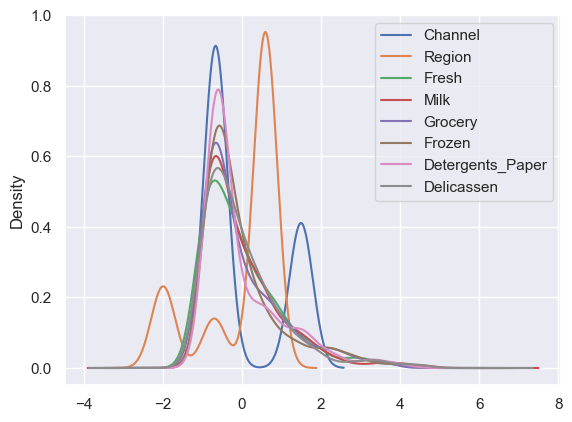

In [27]:
pd.DataFrame(scaled_frame).plot(kind='kde')

<Axes: ylabel='Frequency'>

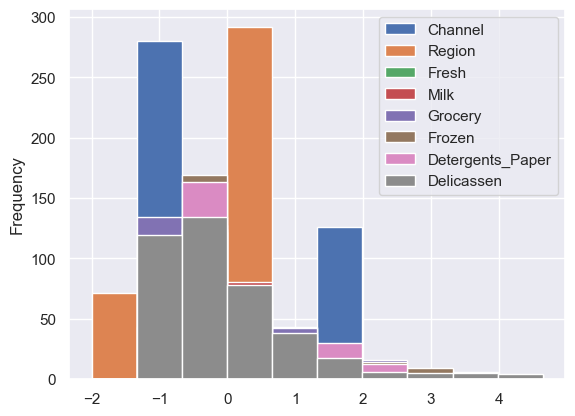

In [28]:
pd.DataFrame(scaled_frame).plot(kind='hist', bins=10)

# MinMax Scaler Method

In [29]:
from sklearn.preprocessing import MinMaxScaler
minmax_scale = MinMaxScaler().fit_transform(df)

In [30]:
scaled_frame2 = pd.DataFrame(minmax_scale,columns=df.columns)
scaled_frame2.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.0,1.0,0.238074,0.372031,0.249934,0.014041,0.180011,0.209609
1,1.0,1.0,0.132589,0.377998,0.316303,0.129039,0.221728,0.278380
2,0.0,1.0,0.249276,0.044213,0.139484,0.473888,0.033967,0.280264
3,1.0,1.0,0.425022,0.207502,0.237930,0.288983,0.119558,0.813629
4,1.0,1.0,0.176873,0.317898,0.169411,0.047619,0.120771,0.227351


In [31]:
scaled_frame2.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000
mean,0.310345,0.772167,0.202681,0.185153,0.221052,0.178463,0.154737,0.189133
std,0.463206,0.387061,0.188152,0.175534,0.206726,0.195137,0.204674,0.178214
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.057686,0.055130,0.069668,0.047916,0.016832,0.061587
50%,0.000000,1.000000,0.151066,0.130740,0.147173,0.102816,0.052635,0.135186
75%,1.000000,1.000000,0.294237,0.258564,0.320271,0.230629,0.243311,0.258832
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: ylabel='Density'>

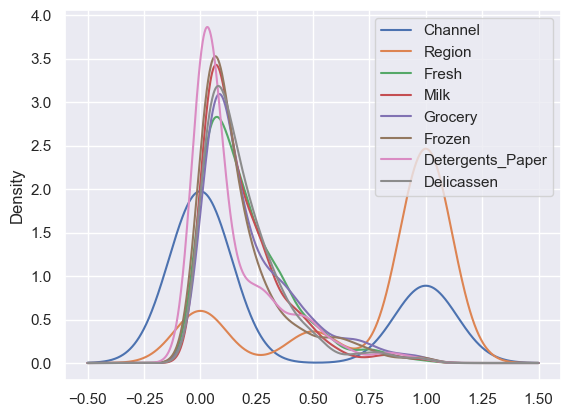

In [32]:
pd.DataFrame(scaled_frame2).plot(kind='kde')

<Axes: ylabel='Frequency'>

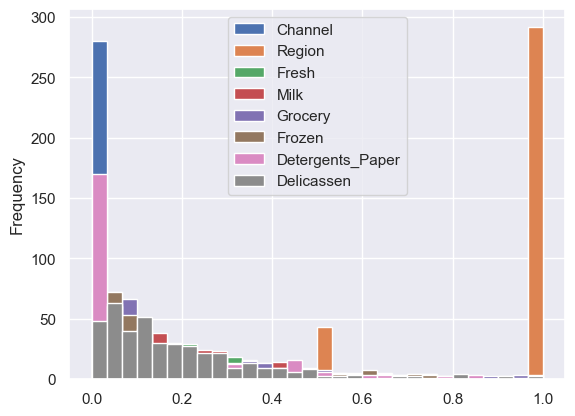

In [33]:
pd.DataFrame(scaled_frame2).plot(kind='hist', bins=30)

In Standard scalar there are no outliers in centered curves while in minmax scaler outliers are present.

So further standart scalar is used.

In [34]:
# drop Categorical features
df_Con=df.drop(['Channel','Region'], axis=1)

In [35]:
df_Con.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
5,9413,8259,5126,666,1795,1451


array([[<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>]],
      dtype=object)

<Figure size 1000x800 with 0 Axes>

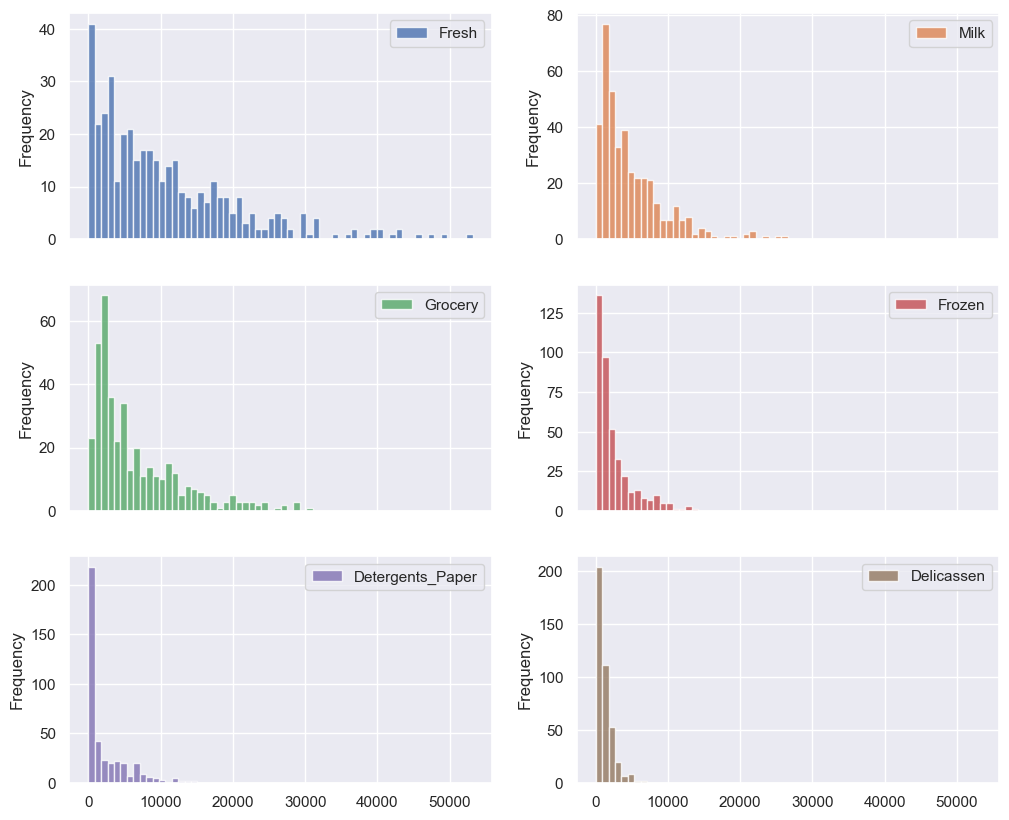

In [36]:
# Histogram
plt.figure(figsize=(10,8))
df_Con.plot(kind='hist', alpha=0.8,bins=60, subplots=True,layout=(3,2),legend=True,figsize=(12,10))

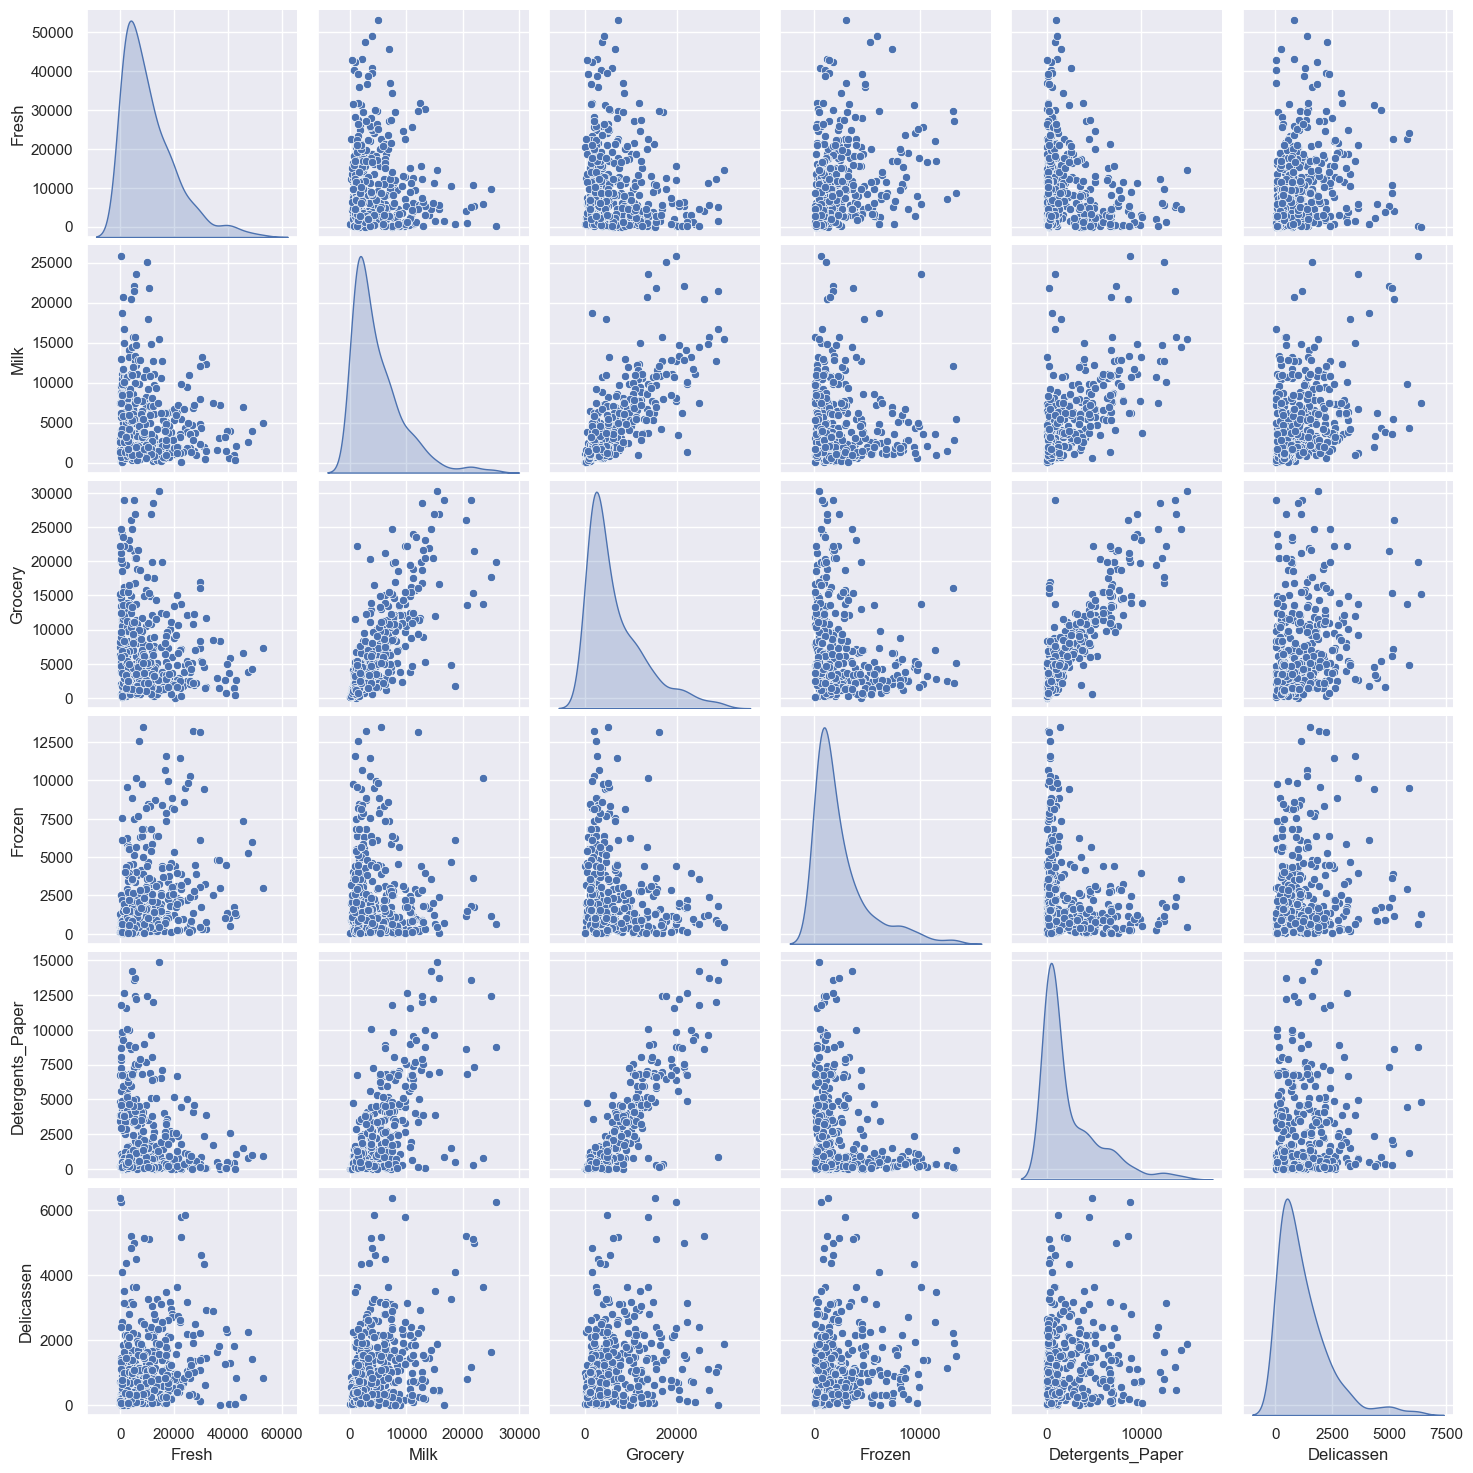

In [37]:
plot1=sns.pairplot(df_Con, diag_kind='kde')

In [38]:
mean_df=df.describe().loc['mean',:]
mean_df

Channel                 1.310345
Region                  2.544335
Fresh               10786.041872
Milk                 4833.243842
Grocery              6687.610837
Frozen               2427.285714
Detergents_Paper     2298.987685
Delicassen           1207.586207
Name: mean, dtype: float64

In [39]:
X = scaled_frame.drop(['Channel'], axis=1)
y = df['Channel']

In [40]:
# Channel has 2 values so we will use channel here from main table and convert channel into binary values
y[y == 2] = 0
y[y == 1] = 1

In [41]:
y.head()

0    0
1    0
3    1
4    0
5    0
Name: Channel, dtype: int64

# Splitting the data into testing and training data.

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model1 Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [46]:
lr = LogisticRegression()

In [47]:
lr.fit(X_train, y_train)

LogisticRegression()

In [48]:
y_pred = lr.predict(X_test)
y_pred

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1], dtype=int64)

In [49]:
lr_train_acc = accuracy_score(y_train, lr.predict(X_train))
lr_train_acc

0.9111842105263158

In [50]:
lr_test_acc = accuracy_score(y_test, y_pred)
lr_test_acc

0.9019607843137255

In [51]:
confusion_matrix(y_test, y_pred)

array([[28,  8],
       [ 2, 64]], dtype=int64)

In [52]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.93      0.78      0.85        36\n           1       0.89      0.97      0.93        66\n\n    accuracy                           0.90       102\n   macro avg       0.91      0.87      0.89       102\nweighted avg       0.90      0.90      0.90       102\n'

# Model2 KNN classifier

In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [54]:
knn = KNeighborsClassifier()

In [55]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [56]:
y_pred = knn.predict(X_test)
y_pred

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1], dtype=int64)

In [57]:
knn_train_acc = accuracy_score(y_train, knn.predict(X_train))
knn_train_acc

0.9144736842105263

In [58]:
knn_test_acc = accuracy_score(y_test, y_pred)
knn_test_acc

0.9117647058823529

In [59]:
classification_report(y_test, y_pred)
classification_report

<function sklearn.metrics._classification.classification_report(y_true, y_pred, *, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')>

# Model3 Support vector Classifier

In [60]:
from sklearn.svm import SVC

In [61]:
svc = SVC()

In [62]:
svc.fit(X_train, y_train)

SVC()

In [63]:
y_pred = svc.predict(X_test)
y_pred

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1], dtype=int64)

In [64]:
svc_train_acc = accuracy_score(y_train, svc.predict(X_train))
svc_train_acc

0.930921052631579

In [65]:
svc_test_acc = accuracy_score(y_test, y_pred)
svc_test_acc

0.9313725490196079

In [66]:
confusion_matrix(y_test, y_pred)

array([[31,  5],
       [ 2, 64]], dtype=int64)

In [67]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.94      0.86      0.90        36\n           1       0.93      0.97      0.95        66\n\n    accuracy                           0.93       102\n   macro avg       0.93      0.92      0.92       102\nweighted avg       0.93      0.93      0.93       102\n'

# Model4 Decision Tree Classifier

In [68]:
from sklearn.tree import DecisionTreeClassifier

In [69]:
dtc = DecisionTreeClassifier()

In [70]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [71]:
y_pred = dtc.predict(X_test)

In [72]:
dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
dtc_train_acc

1.0

In [73]:
dtc_test_acc = accuracy_score(y_test, y_pred)
dtc_test_acc

0.8823529411764706

In [74]:
confusion_matrix(y_test, y_pred)

array([[26, 10],
       [ 2, 64]], dtype=int64)

In [75]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.93      0.72      0.81        36\n           1       0.86      0.97      0.91        66\n\n    accuracy                           0.88       102\n   macro avg       0.90      0.85      0.86       102\nweighted avg       0.89      0.88      0.88       102\n'

# Model5 Decision Tree

In [76]:
from sklearn.model_selection import GridSearchCV

In [77]:
grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1)
}

In [78]:
grid_search = GridSearchCV(dtc, grid_params, cv = 5, n_jobs = -1, verbose = 1)

In [79]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [80]:
GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [81]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 9,
 'min_samples_split': 2}

In [82]:
grid_search.best_score_

0.9209836065573771

In [83]:
dtc = grid_search.best_estimator_

In [84]:
dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
dtc_train_acc

0.944078947368421

In [85]:
dtc_test_acc = accuracy_score(y_test, y_pred)
dtc_test_acc

0.8823529411764706

In [86]:
confusion_matrix(y_test, y_pred)

array([[26, 10],
       [ 2, 64]], dtype=int64)

# Model6 Random Forest Classifier

In [87]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
rand_clf = RandomForestClassifier(criterion = 'gini', max_depth = 3, max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 4, n_estimators = 180)

In [89]:
rand_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=2, min_samples_split=4,
                       n_estimators=180)

In [90]:
y_pred = rand_clf.predict(X_test)
y_pred

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1], dtype=int64)

In [91]:
rand_clf_train_acc = accuracy_score(y_train, rand_clf.predict(X_train))
rand_clf_train_acc

0.9342105263157895

In [92]:
rand_clf_test_acc = accuracy_score(y_test, y_pred)
rand_clf_test_acc

0.9117647058823529

In [93]:
confusion_matrix(y_test, y_pred)

array([[29,  7],
       [ 2, 64]], dtype=int64)

In [94]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.94      0.81      0.87        36\n           1       0.90      0.97      0.93        66\n\n    accuracy                           0.91       102\n   macro avg       0.92      0.89      0.90       102\nweighted avg       0.91      0.91      0.91       102\n'

# Boosting

# Model7 Ada Boost Classifier

In [95]:
from sklearn.ensemble import AdaBoostClassifier

In [96]:
ada = AdaBoostClassifier(base_estimator = dtc)

In [97]:
parameters = {
    'n_estimators' : [50, 70, 90, 120, 180, 200],
    'learning_rate' : [0.001, 0.01, 0.1, 1, 10],
    'algorithm' : ['SAMME', 'SAMME.R']
}

In [98]:
grid_search = GridSearchCV(ada, parameters, n_jobs = -1, cv = 5, verbose = 1)

In [99]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                                                max_depth=5,
                                                                                min_samples_leaf=9)),
             n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'n_estimators': [50, 70, 90, 120, 180, 200]},
             verbose=1)

In [100]:
GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                                                max_depth=5,
                                                                                min_samples_leaf=9,
                                                                                min_samples_split=3)),
             n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'n_estimators': [50, 70, 90, 120, 180, 200]},
             verbose=1)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                                                max_depth=5,
                                                                                min_samples_leaf=9,
                                                                                min_samples_split=3)),
             n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'n_estimators': [50, 70, 90, 120, 180, 200]},
             verbose=1)

In [101]:
grid_search.best_params_

{'algorithm': 'SAMME', 'learning_rate': 0.001, 'n_estimators': 70}

In [102]:
grid_search.best_score_

0.9209836065573771

In [103]:
ada = AdaBoostClassifier(base_estimator = dtc, algorithm = 'SAMME', learning_rate = 0.001, n_estimators = 120)

In [104]:
ada.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=5,
                                                         min_samples_leaf=9),
                   learning_rate=0.001, n_estimators=120)

In [105]:
ada_train_acc = accuracy_score(y_train, ada.predict(X_train))
ada_train_acc

0.944078947368421

In [106]:
ada_test_acc = accuracy_score(y_test, y_pred)
ada_test_acc

0.9117647058823529

In [107]:
confusion_matrix(y_test, y_pred)

array([[29,  7],
       [ 2, 64]], dtype=int64)

In [108]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.94      0.81      0.87        36\n           1       0.90      0.97      0.93        66\n\n    accuracy                           0.91       102\n   macro avg       0.92      0.89      0.90       102\nweighted avg       0.91      0.91      0.91       102\n'

# Model8 Gradient Boosting Classifier

In [109]:
from sklearn.ensemble import GradientBoostingClassifier

In [110]:
gb = GradientBoostingClassifier()

In [111]:
parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.1, 1, 10],
    'n_estimators': [100, 150, 180, 200]
}

In [112]:
grid_search = GridSearchCV(gb, parameters, cv = 5, n_jobs = -1, verbose = 1)

In [113]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 1, 10],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 180, 200]},
             verbose=1)

In [114]:
GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 1, 10],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 180, 200]},
             verbose=1)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 1, 10],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 180, 200]},
             verbose=1)

In [115]:
grid_search.best_params_

{'learning_rate': 0.1, 'loss': 'deviance', 'n_estimators': 150}

In [116]:
grid_search.best_score_

0.9045901639344264

In [117]:
gb = GradientBoostingClassifier(learning_rate = 0.1, loss = 'deviance', n_estimators = 150)

In [118]:
gb.fit(X_train, y_train)

GradientBoostingClassifier(loss='deviance', n_estimators=150)

In [119]:
y_pred = gb.predict(X_test)
y_pred

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1], dtype=int64)

In [120]:
gb_train_acc = accuracy_score(y_train, gb.predict(X_train))
gb_train_acc

1.0

In [121]:
gb_test_acc = accuracy_score(y_test, y_pred)
gb_test_acc

0.9117647058823529

In [122]:
confusion_matrix(y_test, y_pred)

array([[29,  7],
       [ 2, 64]], dtype=int64)

In [123]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.94      0.81      0.87        36\n           1       0.90      0.97      0.93        66\n\n    accuracy                           0.91       102\n   macro avg       0.92      0.89      0.90       102\nweighted avg       0.91      0.91      0.91       102\n'

# Model9 XGBoost

In [124]:
from xgboost import XGBClassifier

In [125]:
xgb = XGBClassifier(booster = 'gblinear', learning_rate = 1, max_depth = 3, n_estimators = 10)

In [126]:
xgb.fit(X_train, y_train)

[06:12:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "max_depth" } are not used.



XGBClassifier(base_score=None, booster='gblinear', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [127]:
y_pred = xgb.predict(X_test)

In [128]:
xgb_train_acc = accuracy_score(y_train, xgb.predict(X_train))
xgb_train_acc

0.9078947368421053

In [129]:
xgb_test_acc = accuracy_score(y_test, y_pred)
xgb_test_acc

0.9019607843137255

# Model10 Stacking

In [130]:
from sklearn.model_selection import train_test_split

In [131]:
train, val_train, test, val_test = train_test_split(X, y, test_size = 0.5, random_state = 355)

In [132]:
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size = 0.2, random_state = 355)

In [133]:
lr = LogisticRegression()

In [134]:
lr.fit(X_train, y_train)

LogisticRegression()

In [135]:
svm = SVC()

In [136]:
svm.fit(X_train, y_train)

SVC()

In [137]:
predict_val1 = lr.predict(val_train)

In [138]:
predict_val2 = svm.predict(val_train)

In [139]:
predict_val = np.column_stack((predict_val1, predict_val2))

In [140]:
predict_test1 = lr.predict(X_test)

In [141]:
predict_test2 = svm.predict(X_test)

In [142]:
predict_test = np.column_stack((predict_test1, predict_test2))

In [143]:
rand_clf = RandomForestClassifier()

In [144]:
rand_clf.fit(predict_val, val_test)

RandomForestClassifier()

In [145]:
stacking_acc = accuracy_score(y_test, rand_clf.predict(predict_test))
stacking_acc

0.9024390243902439

In [146]:
confusion_matrix(y_test, rand_clf.predict(predict_test))

array([[ 6,  2],
       [ 2, 31]], dtype=int64)

In [147]:
classification_report(y_test, rand_clf.predict(predict_test))

'              precision    recall  f1-score   support\n\n           0       0.75      0.75      0.75         8\n           1       0.94      0.94      0.94        33\n\n    accuracy                           0.90        41\n   macro avg       0.84      0.84      0.84        41\nweighted avg       0.90      0.90      0.90        41\n'

In [148]:
models = ['Logistic Regression', 'KNN', 'SVC', 'Decision Tree', 'Random Forest','Ada Boost', 'Gradient Boosting', 'XgBoost', 'Stacking']

In [149]:
scores = [lr_test_acc, knn_test_acc, svc_test_acc, dtc_test_acc, rand_clf_test_acc, ada_test_acc, gb_test_acc, xgb_test_acc, stacking_acc]

In [150]:
models = pd.DataFrame({'Model' : models, 'Score' : scores})

In [151]:
models.sort_values(by = 'Score', ascending = False)

,Model,Score
2,SVC,0.931373
1,KNN,0.911765
4,Random Forest,0.911765
5,Ada Boost,0.911765
6,Gradient Boosting,0.911765
8,Stacking,0.902439
0,Logistic Regression,0.901961
7,XgBoost,0.901961
3,Decision Tree,0.882353


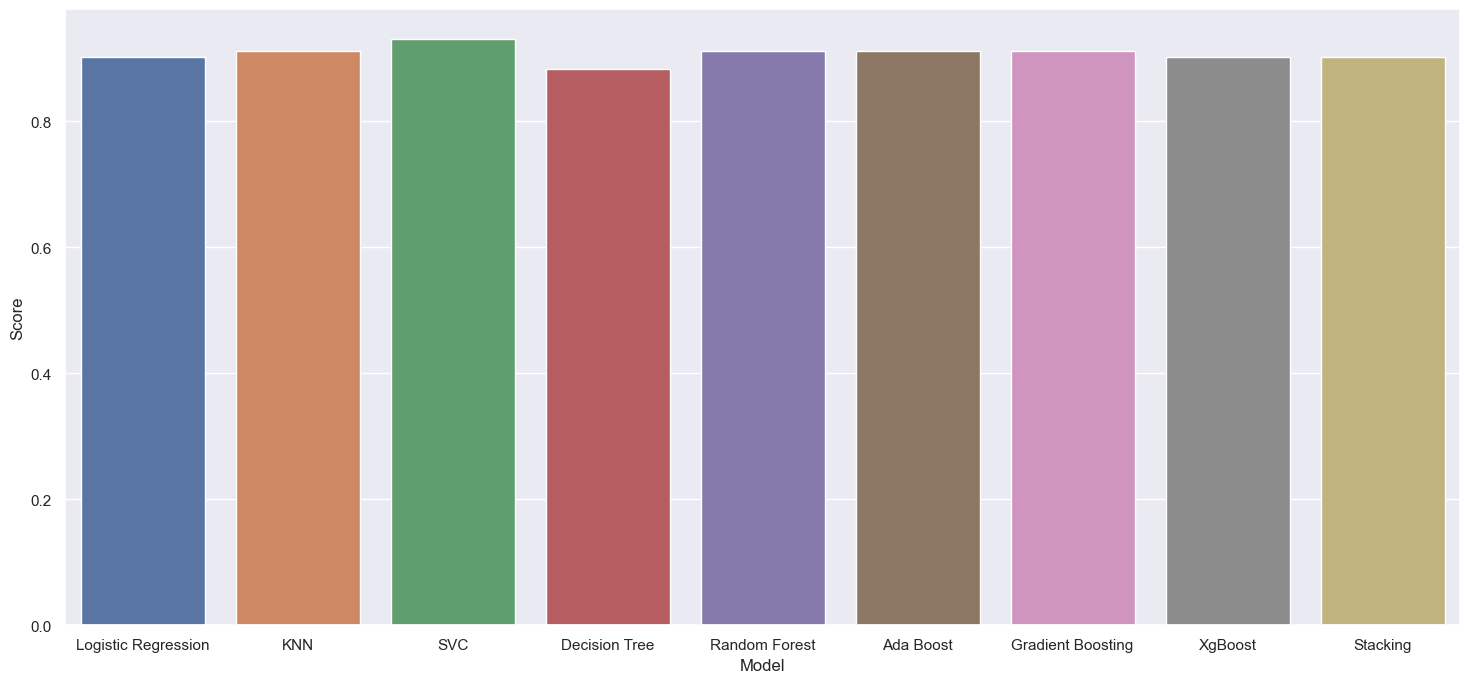

In [152]:
plt.figure(figsize = (18, 8))

sns.barplot(x = 'Model', y = 'Score', data = models)
plt.show()

SVC model provides the best model